## 20장 전이 학습을 통해 딥러닝의 성능 극대화하기

### 1. 소규모 데이터셋으로 만드는 강력한 학습 모델
#### 실습: 치매 환자의 뇌인지 일반인의 뇌인지 예측하기


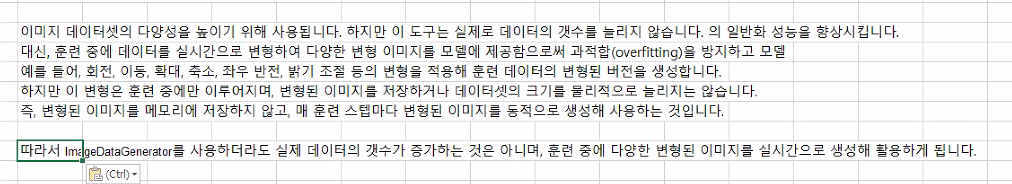

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers


In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#학습셋의 변형을 설정하는 부분입니다. 
train_datagen = ImageDataGenerator(
    # 주어진 이미지의 크기를 설정합니다.
    rescale=1./255,
    # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
    horizontal_flip = True,
    # 전체 크기의 15% 범위에서 좌우로 이동합니다.
    width_shift_range=0.1,
    # 마찬가지로 위, 아래로 이동합니다.    
    #rotation_range=5,  # 정해진 각도만큼 회전시킵니다.
    #shear_range=0.7,   # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
    #zoom_range=1.2,    # 확대 또는 축소시킵니다.
    #vertical_flip=True,  # 수직 대칭 이미지를 만듭니다.
    # 빈 공간을 채우는 방법입니다. nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
    fill_mode='nearest'  
)

In [31]:
train_generator = train_datagen.flow_from_directory(
    #  학습셋이 있는 폴더의 위치입니다.
    '../data/train',
    target_size = (150,150),
    batch_size = 5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [32]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않습니다.
test_datagen = ImageDataGenerator(rescale=1./255)  

In [33]:
test_generator = test_datagen.flow_from_directory(
    # 테스트셋이 있는 폴더의 위치입니다.
    '../data/test',
    target_size = (150,150),
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [34]:
1. / 255 # 0과1로 사이즈 맞추는게 리스케일이다.

0.00392156862745098

In [35]:
150* 0.1

15.0

In [36]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                  

In [46]:
# !pip install SciPy

In [38]:
#모델 실행의 옵션을 설정합니다. 
model.compile(loss='binary_crossentropy', 
            optimizer=optimizers.Adam(learning_rate=0.0002),
            metrics=['accuracy']
)

In [39]:
# 학습의 조기 중단을 설정합니다.
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [40]:
#모델을 실행합니다
history = model.fit(
       train_generator,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10, 
       callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 2s 22ms/step - loss: 0.7248 - accuracy: 0.4938 - val_loss: 0.6939 - val_accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 1s 19ms/step - loss: 0.6940 - accuracy: 0.5188 - val_loss: 0.6885 - val_accuracy: 0.5400
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6934 - accuracy: 0.5312 - val_loss: 0.6876 - val_accuracy: 0.5800
Epoch 4/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6768 - accuracy: 0.6250 - val_loss: 0.6709 - val_accuracy: 0.6200
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6549 - accuracy: 0.6000 - val_loss: 0.6417 - val_accuracy: 0.6200
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6178 - accuracy: 0.7063 - val_loss: 0.5753 - val_accuracy: 0.8200
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.5900 - accuracy: 0.7125 - val_loss: 0.5884 - val_accuracy: 0.6400
Epoch 

In [43]:
list(history.history)

['loss', 'accuracy', 'val_loss', 'val_accuracy']

In [58]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[ForwardRef('ExtensionDtype'), str, numpy.dtype, Type[Union[str, float, int, complex, bool]], NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and l

In [64]:
import pandas as pd

history.history

pd1 = pd.DataFrame(data=np.round(history.history['loss'],2), columns=['loss'])
pd1['val_loss'] = np.round(history.history['val_loss'],2)
pd1['accuracy'] = np.round(history.history['accuracy'],2)
pd1['val_accuracy'] = np.round(history.history['val_accuracy'],2)

pd1.head()

,loss,val_loss,accuracy,val_accuracy
0,0.72,0.69,0.49,0.48
1,0.69,0.69,0.52,0.54
2,0.69,0.69,0.53,0.58
3,0.68,0.67,0.62,0.62
4,0.65,0.64,0.60,0.62


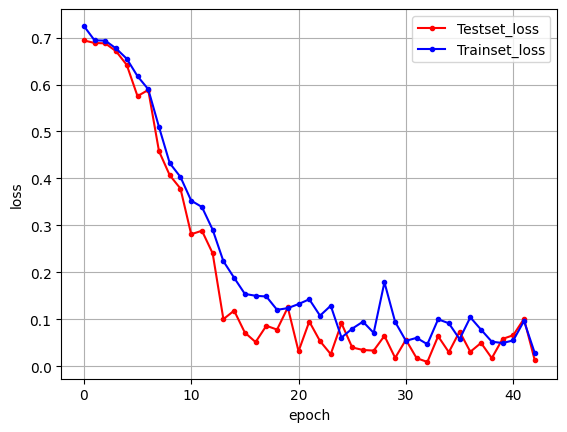

In [44]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

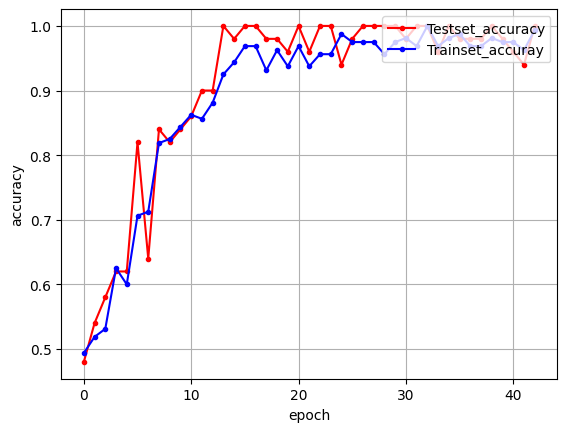

In [45]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_val_accuracy = history.history['val_accuracy']
y_accuracy = history.history['accuracy']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_accuracy))
plt.plot(x_len, y_val_accuracy, marker='.', c="red", label='Testset_accuracy')
plt.plot(x_len, y_accuracy, marker='.', c="blue", label='Trainset_accuray')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()